In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm.jetscapeml_source')#WSU Grid
    sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()


In [3]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=5
epochs=1
dataset_size=1000
simulation_name=f"alpha_s_test_net_{folds}_fold_{epochs}_epoch_dataset_size_{dataset_size/1000}k"

config=Config(simulation_name=simulation_name)

In [5]:
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(1000)
y_classes=y_df.columns
y=y_df.values
display(y_classes)
display(y)

Aggregatring all parameters values
label_items:
 {'eloss_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'eloss_items_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


Index(['0.2', '0.3', '0.4'], dtype='object')

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
k_fold=StratifiedKFold(folds,shuffle=False)

out_of_sample_y=[]
out_of_sample_pred=[]
fold=0

#Must specify y StratifiedKFold for classification
for train,test in k_fold.split(x,y_raw):
    fold+=1
    print(f"Fold #{fold}")

    x_train=x[train]
    y_train=y[train]
    x_test=x[test]
    y_test=y[test]

    import jet_ml.models.test_net as test_net
    input_shape=x[0].shape
    output_shape=y.shape[1]
    activation='softmax'
    model=test_net.build_model(input_shape,output_shape,activation)
    model=test_net.compile_model(model)
    # model.summary()


    batch_size=128
    epochs=1
    monitor='val_loss' #'val_accuracy' or 'val_loss'
    model, history=test_net.train_model(model,
                                        x_train,y_train, x_test,y_test, 
                                        epochs, batch_size, monitor,
                                        )
    
    from jet_ml.evaluation import get_accuracy
    pred, score=get_accuracy(model,x_test=x_test,y_test=y_test)
    out_of_sample_y.append(y_test)
    out_of_sample_pred.append(pred)
    print(f"Fold score (accuracy): {score}")

# Build the oos prediction list and calculate the error.
out_of_sample_y=np.concatenate(out_of_sample_y)
out_of_sample_pred=np.concatenate(out_of_sample_pred)

out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation

Fold #1


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724266072.357924   90065 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724266072.377857   90065 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724266072.37


Epoch 1: val_loss improved from inf to 1.09635, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 4s - 625ms/step - accuracy: 0.3587 - loss: 1.0987 - val_accuracy: 0.3650 - val_loss: 1.0964
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:04
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Fold score (accuracy): 0.365
Fold #2


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09697, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 2s - 341ms/step - accuracy: 0.3225 - loss: 1.0986 - val_accuracy: 0.4000 - val_loss: 1.0970
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:02
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold score (accuracy): 0.4
Fold #3


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09693, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 2s - 317ms/step - accuracy: 0.3250 - loss: 1.0992 - val_accuracy: 0.3500 - val_loss: 1.0969
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:02
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fold score (accuracy): 0.35
Fold #4


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09820, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 2s - 331ms/step - accuracy: 0.3325 - loss: 1.0998 - val_accuracy: 0.3350 - val_loss: 1.0982
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:02
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Fold score (accuracy): 0.335
Fold #5


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09768, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 2s - 323ms/step - accuracy: 0.3275 - loss: 1.0987 - val_accuracy: 0.3500 - val_loss: 1.0977
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:02
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fold score (accuracy): 0.35


In [7]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

0.36

In [8]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y,out_of_sample_pred,y_classes)

3
['OoS_0.2', 'OoS_0.3', 'OoS_0.4']


Confusion matrix, without normalization
[[190  74  70]
 [162  96  76]
 [165  93  74]]
Normalized confusion matrix
[[0.57 0.22 0.21]
 [0.49 0.29 0.23]
 [0.5  0.28 0.22]]


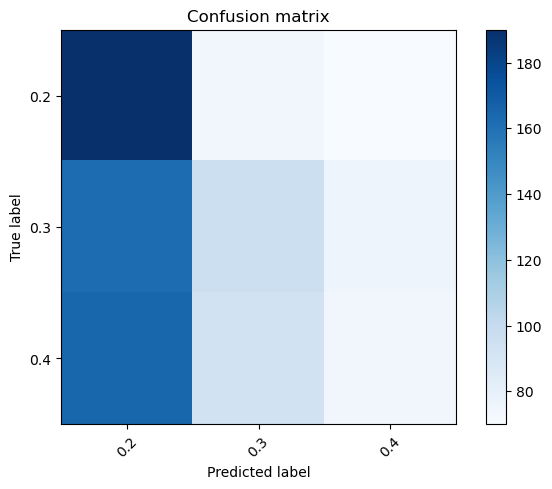

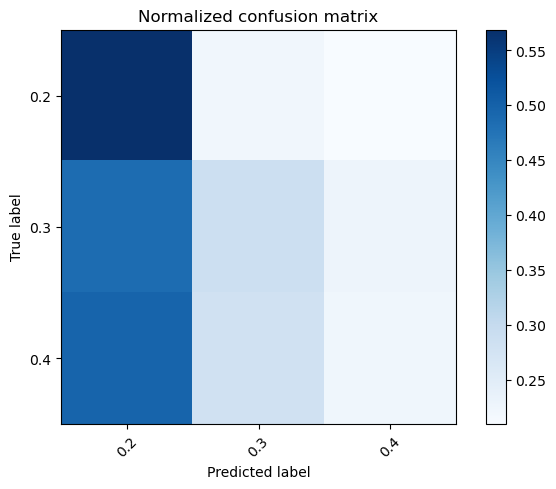

In [9]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)

In [14]:
display(out_of_sample_y)
display(out_of_sample_y_compare)
display(out_of_sample_pred)

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

array([2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0,

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,